# KMeans Clustering

In [1]:
#importing the required libraries
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline 
import pandas as pd

In [6]:
df=pd.read_csv(r"C:\Users\sivak\Documents\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

# Applying feature scaling

In [7]:
scaler=MinMaxScaler()
scale=scaler.fit_transform(df[['Annual Income (k$)',"Spending Score (1-100)"]])
df_scale=pd.DataFrame(scale,columns=['Annual Income (k$)',"Spending Score (1-100)"])
df_scale.head(5)

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [8]:
scaler=MinMaxScaler()
scale=scaler.fit_transform(df[["Annual Income (k$)","Spending Score (1-100)"]])
df_scale=pd.DataFrame(scale,columns=["Annual Income (k$)","Spending Score (1-100)"])
df_scale

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [1]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(df_scale[["Annual Income (k$)","Spending Score (1-100)"]])
y_predicted

NameError: name 'KMeans' is not defined

In [11]:
km.cluster_centers_

array([[0.36929553, 0.31163817],
       [0.37861485, 0.73950929]])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

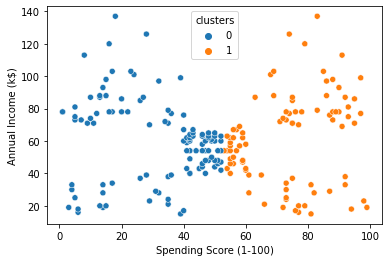

In [16]:
df['clusters']=km.labels_
sns.scatterplot(x="Spending Score (1-100)",y="Annual Income (k$)",hue="clusters",data=df)

ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

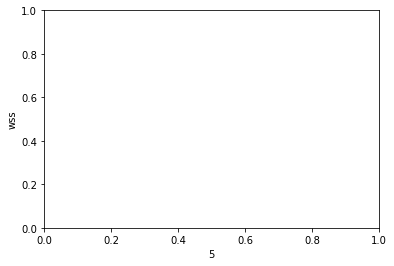

In [21]:
k=range(2,12)
ws=[]
for k in k:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter=kmeans.inertia_
    ws.append(wss_iter)
k=5

plt.xlabel(k)
plt.ylabel("wss")
plt.plot(k,ws)